# Using TraderMade FX spot price data in LUSID

This notebook shows you how to access TraderMade spot FX data in LUSID. For some background, [TraderMade](https://tradermade.com/about) is a vendor of FX data who provide this FX data into your LUSID environment. Each day we load spot prices for 280+ currency pairs.

In [1]:
# Import LUSID APIs and Models
import lusid
import lusid.models as models

# Import LUSID Python tools 
from lusidtools.pandas_utils.lusid_pandas import lusid_response_to_data_frame

# Import general system libraries
from datetime import datetime, timedelta, time, date
import pytz
import os
from datetime import datetime

# Import data wrangling packages
import pandas as pd
import numpy as np
import json

# Create API factory
api_factory = lusid.utilities.ApiClientFactory(
    api_secrets_filename = os.getenv("FBN_SECRETS_PATH"),
    app_name="LusidJupyterNotebook")

print ('LUSID Environment Initialised')
print ('LUSID SDK Version: ', api_factory.build(lusid.api.ApplicationMetadataApi).get_lusid_versions().build_version)

LUSID Environment Initialised
LUSID SDK Version:  0.5.4196.0


### Setup notebook configuration

In [2]:
# Import ploting libraries and configuration
import matplotlib.pyplot as plt

# Use line magic function to enable matplotlib to work interactively with iPython

%matplotlib inline

# Set style to fivethirtyeight to create clean and clear looking graphs

plt.style.use('fivethirtyeight')

# Define a dictionary containing default plotting configurations

params = {'legend.fontsize': 'small',
          'figure.figsize': (12, 4.5),
         'axes.labelsize': 'small',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'}

plt.rcParams.update(params)

with open(r"config/tm_dataframe_mappings.json") as mappings_file:
    json_mappings = json.load(mappings_file)

### Declare a scope which contains TraderMade FX data

The TraderMade FX data is loaded into LUSID each night into the <b>TraderMadeFxData</b> scope. You will need to make LUSID calls against this scope to access the TraderMade data. Please see this [page](https://support.finbourne.com/what-is-a-scope-in-lusid-and-how-is-it-used) for more information on scopes.

In [3]:
scope = "TraderMadeFxData"

### Call FX spot data using LUSID's APIs

We can call the TraderMade data using the QuotesApi passing the <b>TraderMadeFxData</b> scope.

In [4]:
# Declare a QuotesApi object
quotes_api = api_factory.build(lusid.api.QuotesApi)

In [5]:
# Declare string to represent the T - 7 date
t_minus_seven = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")

# Call list_quotes to list out some quotes for past 7 days
quotes_response = quotes_api.list_quotes(scope=scope, filter = f"QuoteId.EffectiveAt gte {t_minus_seven}" )
quotes_df = lusid_response_to_data_frame(quotes_response, column_name_mapping=json_mappings)
quotes_df.head(2)

,Provider,InstrumentID,InstrumentType,QuoteType,Field,EffectiveAt,Value,Unit,Lineage,CutLabel,UploadedBy,AsAt
0,TraderMade,JPY/GBP,CurrencyPair,Price,close,2020-03-19T00:00:00.0000000+00:00,0.00787,JPY,,,00u6p5v36dsHKeZQk2p7,2020-03-24 10:06:57.487856+00:00
1,TraderMade,JPY/GBP,CurrencyPair,Price,close,2020-03-20T00:00:00.0000000+00:00,0.00775,JPY,,,00u6p5v36dsHKeZQk2p7,2020-03-24 10:06:58.115531+00:00


Note - please contact support@lusid.com if you have no FX data in the <b>TraderMadeFxData</b> scope.

### We load quotes for 280+ currency pairs a day 

In [6]:
quotes_response = quotes_api.list_quotes(scope=scope, filter = f"QuoteId.EffectiveAt eq 2020-03-23")
quotes_df = lusid_response_to_data_frame(quotes_response, column_name_mapping=json_mappings)
unique_ccy_pairs = sorted(quotes_df["InstrumentID"].unique())
pd.DataFrame(np.array_split(unique_ccy_pairs, 18), columns = (["CurrencyPair"] * 16))

,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair,CurrencyPair
0,AED/EUR,AED/GBP,AED/USD,ARS/USD,AUD/BRL,AUD/CAD,AUD/CHF,AUD/DKK,AUD/EUR,AUD/GBP,AUD/JPY,AUD/MXN,AUD/NOK,AUD/NZD,AUD/RUB,AUD/SEK
1,AUD/SGD,AUD/USD,BRL/AUD,BRL/COP,BRL/EUR,BRL/GBP,BRL/JPY,BRL/MXN,BRL/USD,CAD/AUD,CAD/CHF,CAD/EUR,CAD/GBP,CAD/JPY,CAD/MXN,CAD/NOK
2,CAD/NZD,CAD/SEK,CAD/USD,CHF/AUD,CHF/CAD,CHF/DKK,CHF/EUR,CHF/GBP,CHF/ISK,CHF/JPY,CHF/NOK,CHF/NZD,CHF/PLN,CHF/SEK,CHF/TRY,CHF/USD
3,CHF/ZAR,CLP/EUR,CLP/USD,CNY/USD,COP/BRL,COP/EUR,COP/USD,CZK/EUR,CZK/GBP,CZK/SEK,CZK/USD,DKK/AUD,DKK/CHF,DKK/EUR,DKK/GBP,DKK/JPY
4,DKK/NOK,DKK/NZD,DKK/SEK,DKK/USD,EUR/AED,EUR/AUD,EUR/BRL,EUR/CAD,EUR/CHF,EUR/CLP,EUR/COP,EUR/CZK,EUR/DKK,EUR/GBP,EUR/HKD,EUR/HRK
5,EUR/HUF,EUR/IDR,EUR/ILS,EUR/INR,EUR/ISK,EUR/JPY,EUR/KRW,EUR/MAD,EUR/MXN,EUR/MYR,EUR/NOK,EUR/NZD,EUR/PEN,EUR/PHP,EUR/PLN,EUR/RON
6,EUR/RUB,EUR/SEK,EUR/SGD,EUR/THB,EUR/TRY,EUR/TWD,EUR/USD,EUR/ZAR,GBP/AED,GBP/AUD,GBP/BRL,GBP/CAD,GBP/CHF,GBP/CZK,GBP/DKK,GBP/EUR
7,GBP/HKD,GBP/HUF,GBP/INR,GBP/JPY,GBP/KRW,GBP/MXN,GBP/MYR,GBP/NOK,GBP/NZD,GBP/PLN,GBP/SEK,GBP/SGD,GBP/THB,GBP/TRY,GBP/USD,GBP/ZAR
8,HKD/EUR,HKD/GBP,HKD/JPY,HKD/USD,HRK/EUR,HRK/USD,HUF/EUR,HUF/GBP,HUF/USD,ILS/EUR,ILS/USD,INR/EUR,INR/GBP,INR/USD,ISK/CHF,ISK/EUR
9,ISK/USD,JPY/AUD,JPY/BRL,JPY/CAD,JPY/CHF,JPY/DKK,JPY/EUR,JPY/GBP,JPY/HKD,JPY/MXN,JPY/NOK,JPY/NZD,JPY/SEK,JPY/SGD,JPY/TRY,JPY/USD


### Get a time series of GBP/EUR for past 3 months

You can use Python's plotting packages to plot a time series of quotes for a given currency pair.

In [7]:
t_minus_three_months = (datetime.now() - timedelta(days=90)).strftime("%Y-%m-%d")
currency_pair = "GBP/EUR"

In [8]:
response_filter = f"QuoteId.EffectiveAt gte {t_minus_three_months} and QuoteId.QuoteSeriesId.InstrumentId eq '{currency_pair}'"
quotes_response_all = quotes_api.list_quotes(scope=scope, filter=response_filter)
quotes_df = lusid_response_to_data_frame(quotes_response_all, column_name_mapping=json_mappings)
quotes_df["EffectiveAt"] = pd.to_datetime(quotes_df["EffectiveAt"].str[:10], format='%Y/%m/%d')
quotes_df.set_index("EffectiveAt", inplace=True)

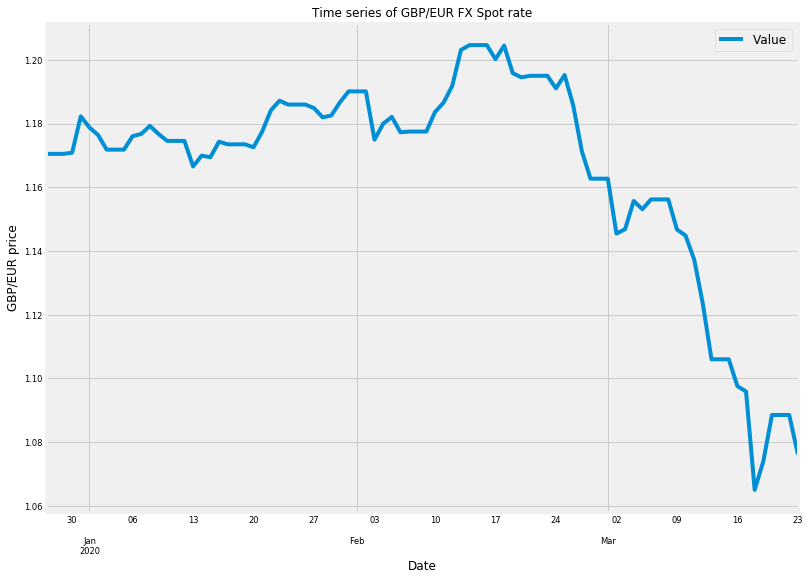

In [9]:
timeseries = quotes_df.plot(y=["Value"], figsize=(12,9))
timeseries.set_title(f"Time series of {currency_pair} FX Spot rate", fontsize="large")
timeseries.set_ylabel(f'{currency_pair} price', fontsize="large")
timeseries.set_xlabel('Date', fontsize="large")
timeseries.legend(prop={'size': 12})